In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('Finalcombined.csv')
X=dataset.iloc[:,:-1] 
y=dataset.iloc[:,-1] 

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [4]:
from sklearn.neighbors import KNeighborsRegressor

In [5]:
kn = KNeighborsRegressor(n_neighbors=1)
kn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [6]:
print(kn.score(X_train, y_train))

1.0


In [7]:
print(kn.score(X_test, y_test))

0.3820085833313066


In [8]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(kn, X, y, cv = 3)

In [9]:
score.mean()

0.21544843109832443

In [12]:
#HYPERPARAMETER TUNING
accuracy = []
for i in range(1, 40):
    kn = KNeighborsRegressor(n_neighbors=i)
    score = cross_val_score(kn, X, y, cv=5, scoring="neg_mean_squared_error")
    accuracy.append(score.mean())

In [21]:
cross_val_score(kn, X, y, cv = 3).mean()

0.5157024203216849

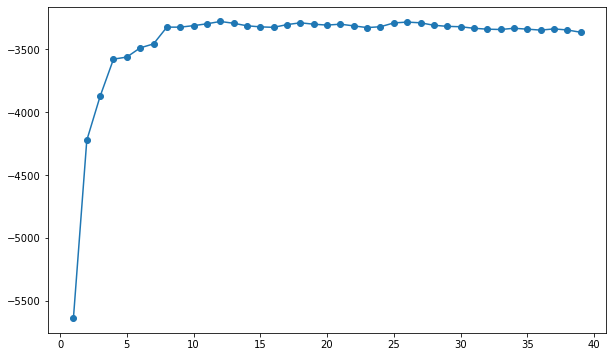

In [13]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 40), accuracy, marker='o')

In [14]:
kn = KNeighborsRegressor(n_neighbors=5)
kn.fit(X_train, y_train)

KNeighborsRegressor()

In [17]:
prediction=kn.predict(X_test)

In [18]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 36.720977777777776
MSE: 3100.9031288126985
RMSE: 55.68575337384508


In [ ]:
#Random Forest